# Link Dataset

Dikarenakan ukuran dataset yang terlalu besar(42MB), maka untuk dataset saya upload di gdrive, berikut link Gdrive dataset:

[Belgium Population Classification](https://drive.google.com/file/d/1WGAMXm3Pkl7sp2xvdJQPbsOa4Z-MpESc/view?usp=sharing)

Import library yang diperlukan untuk melakukan preprocessing(Data Cleaning, Data Transforming) dan DNN

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from tensorflow.keras import Sequential, layers, callbacks

Membaca dataset

In [26]:
df = pd.read_csv("BELGIUM_POPULATION_STRUCTURE_2018.csv")
df

,MUNICIPALITY REFNIS CODE,MUNICIPALITY NAME,DISTRICT REFNIS CODE,DISTRICT NAME,PROVINCE REFNIS CODE,PROVINCE NAME,REGION REFNIS CODE,REGION NAME,GENDER,NATIONALITY,CIVIL CODE STATUS,AGE,POPULATION
0,71024,Herk-de-Stad,71000,Hasselt,70000.0,Limburg,2000,Flemish Region,F,Belgian,Married,39,42
1,71037,Lummen,71000,Hasselt,70000.0,Limburg,2000,Flemish Region,M,Belgian,Married,82,24
2,71011,Diepenbeek,71000,Hasselt,70000.0,Limburg,2000,Flemish Region,F,Belgian,Married,42,51
3,71016,Genk,71000,Hasselt,70000.0,Limburg,2000,Flemish Region,M,Belgian,Married,63,277
4,71017,Gingelom,71000,Hasselt,70000.0,Limburg,2000,Flemish Region,F,Belgian,Married,30,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465413,92141,La Bruy�re,92000,Namen,90000.0,Namen,3000,Walloon Region,F,Alien,Divorced,64,1
465414,46024,Stekene,46000,Sint-Niklaas,40000.0,Oost-Vlaanderen,2000,Flemish Region,M,Alien,Divorced,67,2
465415,46024,Stekene,46000,Sint-Niklaas,40000.0,Oost-Vlaanderen,2000,Flemish Region,M,Alien,Divorced,74,1
465416,46024,Stekene,46000,Sint-Niklaas,40000.0,Oost-Vlaanderen,2000,Flemish Region,M,Alien,Divorced,81,1


# Data Preprocessing

## Data Cleaning

Memeriksa jumlah nilai null pada dataset

In [27]:
df.isna().sum()

MUNICIPALITY REFNIS CODE        0
MUNICIPALITY NAME               0
DISTRICT REFNIS CODE            0
DISTRICT NAME                   0
PROVINCE REFNIS CODE        21425
PROVINCE NAME               21425
REGION REFNIS CODE              0
REGION NAME                     0
GENDER                          0
NATIONALITY                     0
CIVIL CODE STATUS               0
AGE                             0
POPULATION                      0
dtype: int64

## Data Transforming

Menggunakan SimpleImputer dengan strategi "most_frequent" untuk mengisi nilai yang hilang (missing values) dalam kolom 'PROVINCE REFNIS CODE' dan 'PROVINCE NAME' dengan nilai yang paling sering muncul dalam masing-masing kolomnya.

In [28]:
imputer = SimpleImputer(strategy="most_frequent")
df["PROVINCE REFNIS CODE"] = imputer.fit_transform(df[["PROVINCE REFNIS CODE"]])
df["PROVINCE NAME"] = imputer.fit_transform(df[["PROVINCE NAME"]])

Memeriksa jumlah nilai null pada dataset

In [29]:
df.isna().sum()

MUNICIPALITY REFNIS CODE    0
MUNICIPALITY NAME           0
DISTRICT REFNIS CODE        0
DISTRICT NAME               0
PROVINCE REFNIS CODE        0
PROVINCE NAME               0
REGION REFNIS CODE          0
REGION NAME                 0
GENDER                      0
NATIONALITY                 0
CIVIL CODE STATUS           0
AGE                         0
POPULATION                  0
dtype: int64

Melakukan beberapa transformasi data pada beberapa kolom di dataset, termasuk meng-encode kolom 'CIVIL CODE STATUS', 'GENDER', dan 'NATIONALITY' ke dalam bentuk numerik dengan bantuan OrdinalEncoder, melakukan normalisasi Min-Max pada kolom 'AGE', dan melakukan standardisasi pada kolom 'POPULATION' untuk mempersiapkan data untuk pemrosesan lebih lanjut.

In [30]:
ordinal = OrdinalEncoder()
df["CIVIL CODE STATUS"] = ordinal.fit_transform(df[["CIVIL CODE STATUS"]])

df["GENDER"] = ordinal.fit_transform(df[["GENDER"]])

age_normalized = MinMaxScaler().fit_transform(df[["AGE"]])
age = pd.DataFrame(age_normalized, columns=["AGE"])
df.drop(columns="AGE", inplace=True)
df = pd.concat([df, age], axis=1)

population_standard_scaler = StandardScaler().fit_transform(df[["POPULATION"]])
population = pd.DataFrame(population_standard_scaler, columns=["POPULATION"])
df.drop(columns="POPULATION", inplace=True)
df = pd.concat([df, population], axis=1)

df["NATIONALITY"] = ordinal.fit_transform(df[["NATIONALITY"]])
df

,MUNICIPALITY REFNIS CODE,MUNICIPALITY NAME,DISTRICT REFNIS CODE,DISTRICT NAME,PROVINCE REFNIS CODE,PROVINCE NAME,REGION REFNIS CODE,REGION NAME,GENDER,NATIONALITY,CIVIL CODE STATUS,AGE,POPULATION
0,71024,Herk-de-Stad,71000,Hasselt,70000.0,Limburg,2000,Flemish Region,0.0,1.0,1.0,0.39,0.275423
1,71037,Lummen,71000,Hasselt,70000.0,Limburg,2000,Flemish Region,1.0,1.0,1.0,0.82,-0.006945
2,71011,Diepenbeek,71000,Hasselt,70000.0,Limburg,2000,Flemish Region,0.0,1.0,1.0,0.42,0.416606
3,71016,Genk,71000,Hasselt,70000.0,Limburg,2000,Flemish Region,1.0,1.0,1.0,0.63,3.961885
4,71017,Gingelom,71000,Hasselt,70000.0,Limburg,2000,Flemish Region,0.0,1.0,1.0,0.30,-0.163815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465413,92141,La Bruy�re,92000,Namen,90000.0,Namen,3000,Walloon Region,0.0,0.0,0.0,0.64,-0.367747
465414,46024,Stekene,46000,Sint-Niklaas,40000.0,Oost-Vlaanderen,2000,Flemish Region,1.0,0.0,0.0,0.67,-0.352060
465415,46024,Stekene,46000,Sint-Niklaas,40000.0,Oost-Vlaanderen,2000,Flemish Region,1.0,0.0,0.0,0.74,-0.367747
465416,46024,Stekene,46000,Sint-Niklaas,40000.0,Oost-Vlaanderen,2000,Flemish Region,1.0,0.0,0.0,0.81,-0.367747


# Deep Neural Network (DNN)

Mengambil kolom 'POPULATION', 'AGE', 'CIVIL CODE STATUS', 'GENDER', 'DISTRICT REFNIS CODE', dan 'PROVINCE REFNIS CODE' sebagai fitur (variabel independen) dalam variabel X, serta kolom 'NATIONALITY' sebagai target (variabel dependen) dalam variabel y. Kemudian, data dibagi menjadi data pelatihan (X_train, y_train) dan data pengujian (X_test, y_test) dengan rasio 70:30, menggunakan seed (random_state) 42 untuk memastikan pengulangan yang konsisten dalam pemisahan data.

In [31]:
X = df[['POPULATION', 'AGE', 'CIVIL CODE STATUS', 'GENDER', 'DISTRICT REFNIS CODE', 'PROVINCE REFNIS CODE']]
y = df['NATIONALITY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Menggunakan aktivasi ReLU untuk klasifikasi biner dan hidden layer, aktivasi sigmoid untuk lapisan output.

In [32]:
model = Sequential([
    layers.Dense(16, activation='relu', input_shape=[6]),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Variabel **es** digunakan sebagai callback dalam pelatihan model untuk menghentikan pelatihan jika metrik "val_accuracy" pada data validasi tidak mengalami perbaikan dalam 5 iterasi berturut-turut, dan opsi "restore_best_weights" digunakan untuk mengembalikan bobot model ke iterasi dengan kinerja terbaik.

In [33]:
es = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

Melatih model DNN dengan data train, validation sebesar 20%, selama 50 epoch dengan tampilan informasi pelatihan

In [34]:
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, verbose=1, callbacks=[es])

Epoch 1/1000


8145/8145 [==============================] - 32s 4ms/step - loss: 35.8272 - accuracy: 0.5600 - val_loss: 3.8381 - val_accuracy: 0.6639
Epoch 2/1000
8145/8145 [==============================] - 26s 3ms/step - loss: 4.2845 - accuracy: 0.5666 - val_loss: 4.1710 - val_accuracy: 0.6675
Epoch 3/1000
8145/8145 [==============================] - 25s 3ms/step - loss: 1.2889 - accuracy: 0.5856 - val_loss: 0.6672 - val_accuracy: 0.6675
Epoch 4/1000
8145/8145 [==============================] - 25s 3ms/step - loss: 0.7188 - accuracy: 0.6318 - val_loss: 0.6347 - val_accuracy: 0.6675
Epoch 5/1000
8145/8145 [==============================] - 28s 3ms/step - loss: 0.6381 - accuracy: 0.6646 - val_loss: 0.6360 - val_accuracy: 0.6675
Epoch 6/1000
8145/8145 [==============================] - 29s 4ms/step - loss: 0.6380 - accuracy: 0.6646 - val_loss: 0.6360 - val_accuracy: 0.6675
Epoch 7/1000
8145/8145 [==============================] - 26s 3ms/step - loss: 0.6380 - accuracy: 0.6646 - val_loss: 0.6360 - val_

Mengevaluasi model DNN dengan data test dan mengembalikan nilai kerugian (loss) dan akurasi yang diperoleh

In [35]:
model.evaluate(X_test, y_test)

   1/4364 [..............................] - ETA: 2:20 - loss: 5.0544 - accuracy: 0.6250

4364/4364 [==============================] - 9s 2ms/step - loss: 4.2116 - accuracy: 0.6663


[4.211580753326416, 0.6662942171096802]

Mengambil metrik akurasi (accuracy) dari setiap epoch

In [36]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

Membuat grafik untuk akurasi

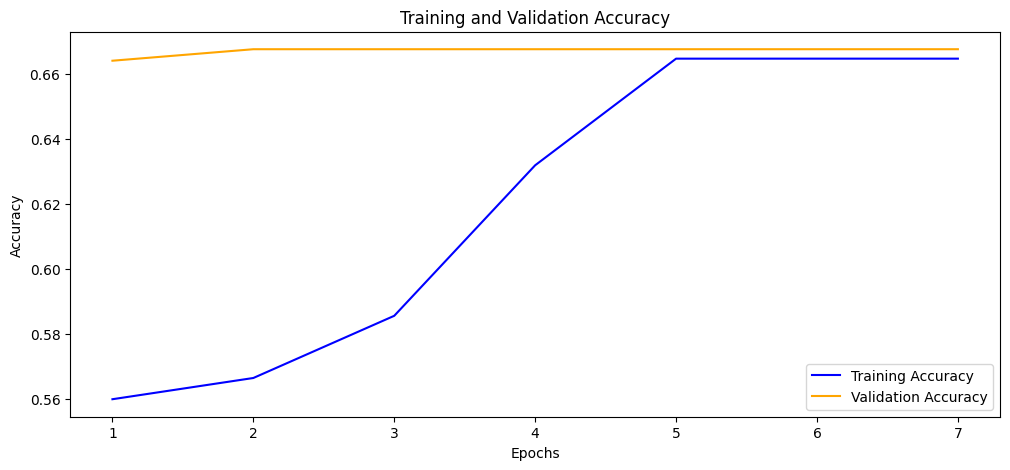

In [37]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy', color='blue')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy',  color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Mengambil loss dari setiap epoch

In [38]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

Membuat grafik untuk loss

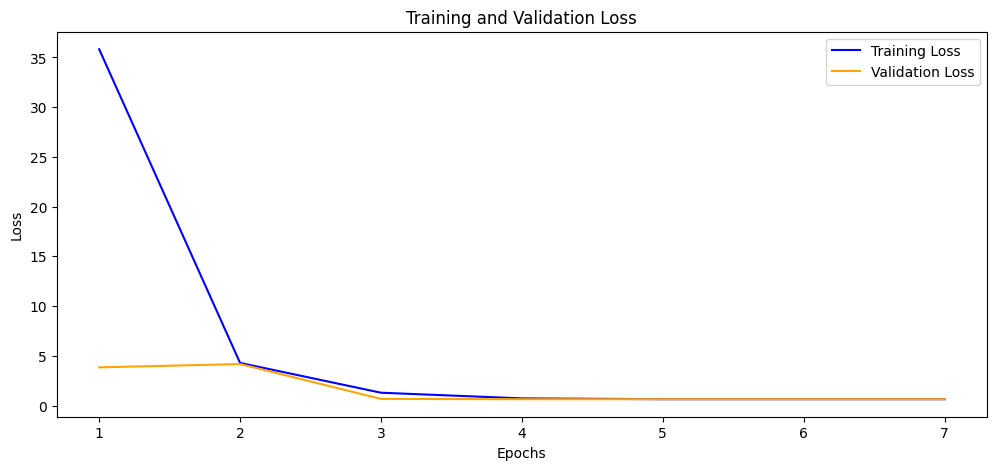

In [39]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()